In [221]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [222]:
def sigmoid (x):
    return 1 / (1 + np.exp(-x)) # activation function
def sigmoid_(x): return x * (1 - x) # derivative of sigmoid


In [229]:

class RN:
    
    
    def __init__(self):
        self.epochs = 2000 # Number of iterations
        inputLayerSize, hiddenLayerSize, outputLayerSize = 3, 2, 1
        self.L = .1 # learning rate
    
        # weights on layer inputs  
        self.Wh = np.random.normal(size=(inputLayerSize, hiddenLayerSize))
        self.Wz = np.random.normal(size=(hiddenLayerSize,outputLayerSize))
    
        
    def feedforward (self,X):
            H = sigmoid(np.dot(X, self.Wh)) # hidden layer results
            Z = np.dot(H, self.Wz)
            return sigmoid(Z)
    
    def train (self, X ,Y):
        for i in range(self.epochs):
            H = sigmoid(np.dot(X, self.Wh)) # hidden layer results
            Z = np.dot(H,self.Wz) # output layer, no activation
            E = Y - Z # how much we missed (error)
            dZ = E * self.L # delta Z
            self.Wz += H.T.dot(dZ) # update output layer weights
            dH = dZ.dot(self.Wz.T) * sigmoid_(H) # delta H
            self.Wh += X.T.dot(dH) # update hidden layer weights
            if i % 2000 == 0:
                print("accuracy " ,(1-E).mean())
        return Z # what have we learnt?
X = np.array([
  [12, 34,10],  #Skin
  [-25, -23, -1],   #no_Skin
  [-95, -13, -23],   # no_Skin
  [-95, 0, 30],   # no_Skin
  [12, -13, -23],   # no_Skin
  [95, 101,11], # Skin
  [-24,13,77],
  [-100,-32,12],
  [-50,-33,-1],
  [116,151,215],
  [86,110,156],
  [3,1,0],
  [2,0,0],
  [3,3,0],
])
Y = np.array([
  [1], # Skin
  [0], # no_Skin
  [0], # no_Skin
  [0],
  [0],
  [1], # Skin
  [0],
  [0],
  [0],
  [1],
  [1],
  [0],
  [0],
  [0],
])

image = RN()
image.train( X , Y)

accuracy  0.73935690127441


array([[ 6.62463596e-01],
       [-1.21190176e-15],
       [-5.99527935e-61],
       [ 2.93456232e-55],
       [-3.29999145e-01],
       [ 3.33353742e-01],
       [ 6.63352887e-01],
       [-3.56562489e-79],
       [-3.48282876e-33],
       [ 6.63352887e-01],
       [ 6.63352887e-01],
       [ 3.35698515e-01],
       [ 3.40187521e-01],
       [ 3.39165711e-01]])

In [230]:
def plot_confusion_matrix(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred,
                          title='Confusion matrix, without normalization')
    
    # Plot normalized confusion matrix
    plot_confusion_matrix(y_true, y_pred, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()


In [233]:
from sklearn.metrics import confusion_matrix
y_true, y_pred = [], []
for i in range(14):
    y_true.append(Y[i])
    if image.train(X,Y)[i]> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(confusion_matrix(y_true, y_pred))

accuracy  0.9764944262311305
accuracy  0.9764027590023445
accuracy  0.9782129971780914
accuracy  0.9797655942399601
accuracy  0.9841960813147158
accuracy  0.9762508928913948
accuracy  0.9762721048234312
accuracy  0.9763333269024441
accuracy  0.9770357902137665
accuracy  0.9821423678308027
accuracy  0.8609455183702471
accuracy  0.9762965497084272
accuracy  0.9764722638919073
accuracy  0.9780384805199508
[[9 1]
 [2 2]]


Confusion matrix, without normalization
[[9 1]
 [2 2]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

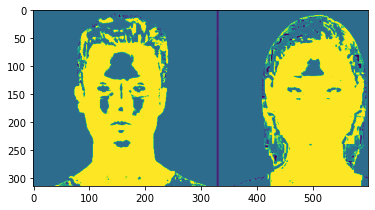

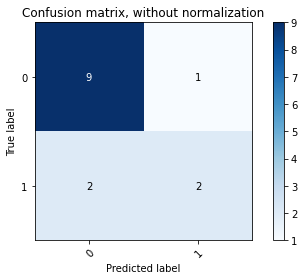

In [234]:
img = cv.imread('C:/Users/hp/Downloads/Rn/8.JPG')
plt.imshow(image.feedforward(img)[:,:,0])

plot_confusion_matrix(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues)